##📦 Block 1: Colab Environment Setup (Local - No Drive)
📦 This block sets up the entire project environment in Google Colab (without using Google Drive). It performs two key tasks:

1️⃣ **Installing Dependencies**: Installs essential Python libraries:
   - `yfinance` for downloading historical stock data.
   - `ta` for calculating technical indicators (like RSI).
   - `tensorflow` and `keras` for building and training deep learning models.
   - `streamlit` for dashboarding (useful for app deployment if needed).

2️⃣ **Creating Project Folder Structure**: Defines a base directory (`/content/stock-lstm-project`) and creates subdirectories:
   - `/data` to store raw stock CSV data.
   - `/models` to store saved LSTM model weights.

✅ This organization helps maintain a clean and structured workspace inside the Colab environment.


In [2]:
# -----------------------------------------------
# 🔧 1. Colab Environment Setup (Local - No Drive)
# -----------------------------------------------

# ✅ Step 1: Install Required Libraries
# These are essential packages for data fetching, preprocessing,
# building LSTM models, technical analysis, and dashboarding.
!pip install --upgrade yfinance ta tensorflow keras streamlit

# -----------------------------------------------
# 📁 Step 2: Create Project Directory Structure
# -----------------------------------------------

import os

# Root folder for the project (local to Colab's filesystem)
base_dir = '/content/stock-lstm-project'

# Sub-folder for storing raw data downloaded from Yahoo Finance
data_dir = os.path.join(base_dir, 'data')

# Sub-folder for saving trained model files (e.g., LSTM weights)
models_dir = os.path.join(base_dir, 'models')

# Create the directories if they do not already exist
os.makedirs(data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

# ✅ Confirm setup
print("✅ All dependencies installed successfully.")
print(f"📁 Project base directory: {base_dir}")
print(f"📁 Data will be saved in: {data_dir}")
print(f"📁 Models will be saved in: {models_dir}")


✅ All dependencies installed successfully.
📁 Project base directory: /content/stock-lstm-project
📁 Data will be saved in: /content/stock-lstm-project/data
📁 Models will be saved in: /content/stock-lstm-project/models


##📉 Block 2: Data Acquisition - Download Stock Data
📉 This block fetches historical stock price data for a specific ticker symbol using the `yfinance` API and saves it for later use.

1️⃣ **Stock Selection**: Here, the ticker used is "AAPL" (Apple Inc.) with a date range from 2010 to 2024.

2️⃣ **Data Download**: The `yf.download()` function pulls historical data, including columns like Open, High, Low, Close, Volume, and Adjusted Close.

3️⃣ **Save to CSV**: The downloaded data is saved locally to `/content/stock-lstm-project/data/AAPL.csv` so it can be reused across sessions or notebooks.

✅ This ensures data persistence, minimizes redundant API calls, and enables reproducibility.


In [3]:
# -----------------------------------------------
# 📊 2. Data Acquisition - Download Stock Data
# -----------------------------------------------

import yfinance as yf  # Yahoo Finance API
import pandas as pd    # Data manipulation

# Define the stock ticker symbol and date range for data
ticker = "AAPL"                       # 🏷️ Apple Inc.
start_date = "2010-01-01"            # ⏳ Start date for data
end_date = "2024-01-01"              # ⏱️ End date for data

# ✅ Download historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Preview the first few rows to ensure data is loaded correctly
print("📈 Sample of downloaded stock data:")
print(df.head())

# 📂 Define path to save the CSV file locally in Colab's directory structure
csv_path = os.path.join(data_dir, f"{ticker}.csv")

# 💾 Save the DataFrame to CSV
df.to_csv(csv_path)

# ✅ Confirmation
print(f"\n✅ Saved raw stock data for {ticker} to: {csv_path}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

📈 Sample of downloaded stock data:
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431896  6.446622  6.382907  6.414464  493729600
2010-01-05  6.443017  6.479383  6.409056  6.449630  601904800
2010-01-06  6.340533  6.468564  6.333921  6.443018  552160000
2010-01-07  6.328809  6.371487  6.282827  6.363973  477131200
2010-01-08  6.370887  6.371488  6.283129  6.320396  447610800

✅ Saved raw stock data for AAPL to: /content/stock-lstm-project/data/AAPL.csv


##📊 Block 3: Exploratory Data Analysis (EDA)
📊 This block performs a thorough exploratory data analysis (EDA) on the downloaded stock data to understand trends, validate quality, and extract useful features.

1️⃣ **Loading & Cleaning Data**:
   - Ensures the `Date` column is parsed as datetime.
   - Converts numeric columns to the appropriate type.
   - Sets the Date column as the index for time-series operations.

2️⃣ **Visualizing Trends**:
   - Plots the historical closing price to identify trends and anomalies.

3️⃣ **Technical Indicators**:
   - Calculates 20-day and 50-day Moving Averages (`MA20`, `MA50`).
   - Computes the 14-day Relative Strength Index (`RSI14`) using the `ta` package.

4️⃣ **Correlation Analysis**:
   - Displays a heatmap of feature correlations to explore relationships.

✅ This block helps gain critical insights into price patterns, adds meaningful features for the model, and ensures clean and usable input data.


📄 First few rows of raw data:
        Price               Close               High                Low  \
0      Ticker                AAPL               AAPL               AAPL   
1        Date                 NaN                NaN                NaN   
2  2010-01-04   6.431895732879639  6.446622218528988  6.382907496530451   
3  2010-01-05   6.443017482757568  6.479383082615439  6.409055871873718   
4  2010-01-06  6.3405327796936035   6.46856375161783  6.333920706507196   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2  6.4144643088171485  493729600  
3   6.449629555919628  601904800  
4   6.443017506482532  552160000  

📄 Data preview:
                                    Price     Close      High       Low  \
Date                                                                      
1970-01-01 00:00:00.000000002  2010-01-04  6.431896  6.446622  6.382907   
1970-01-01 00:00:00.000000003  2010-01-05  6.443017  6.479383  6.40

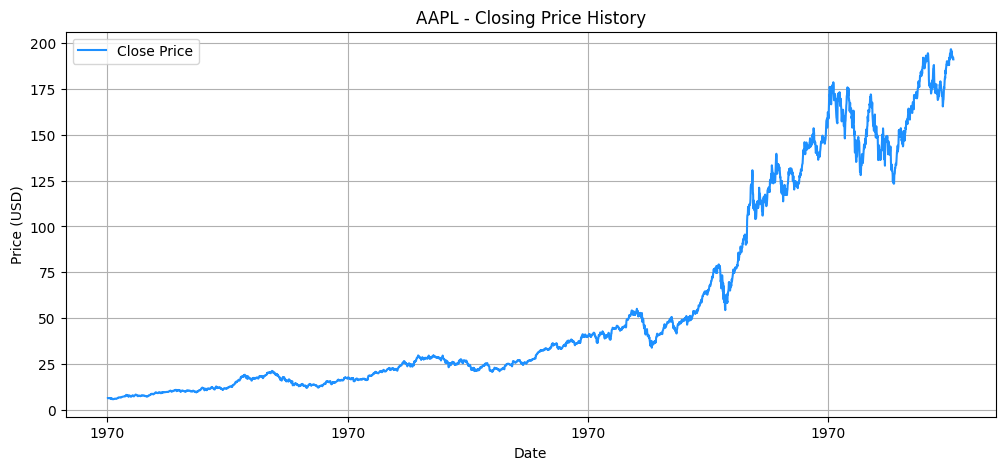

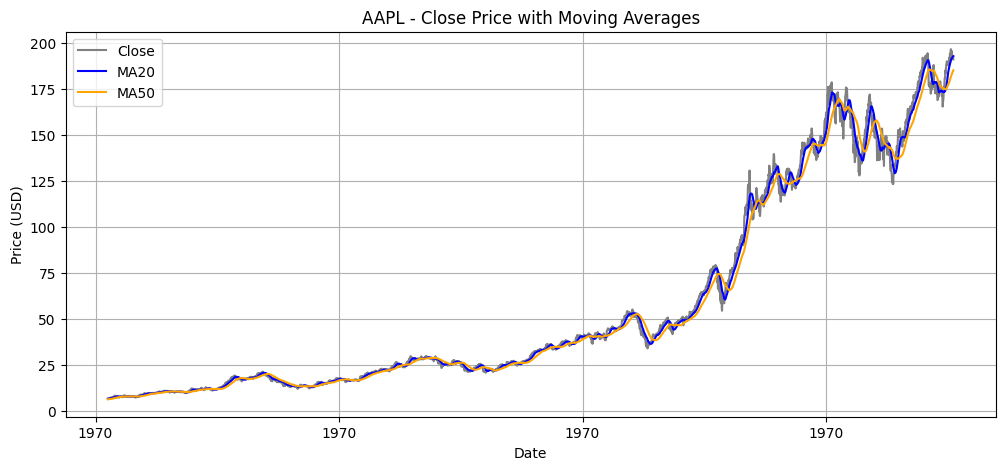

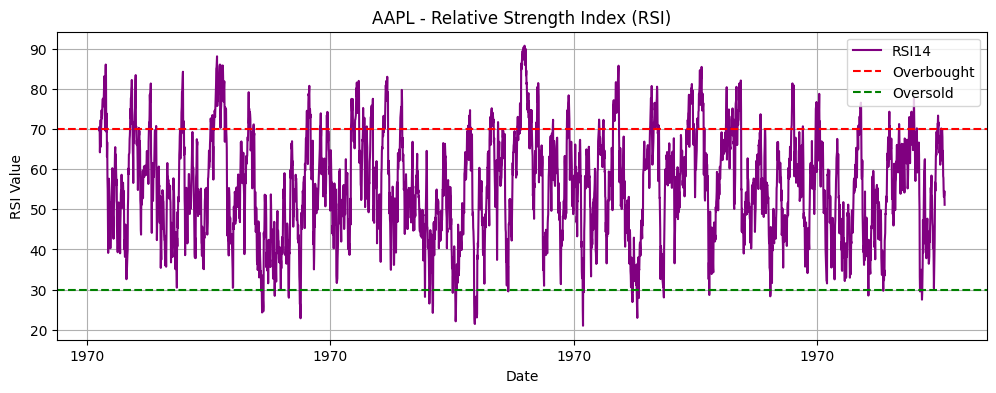

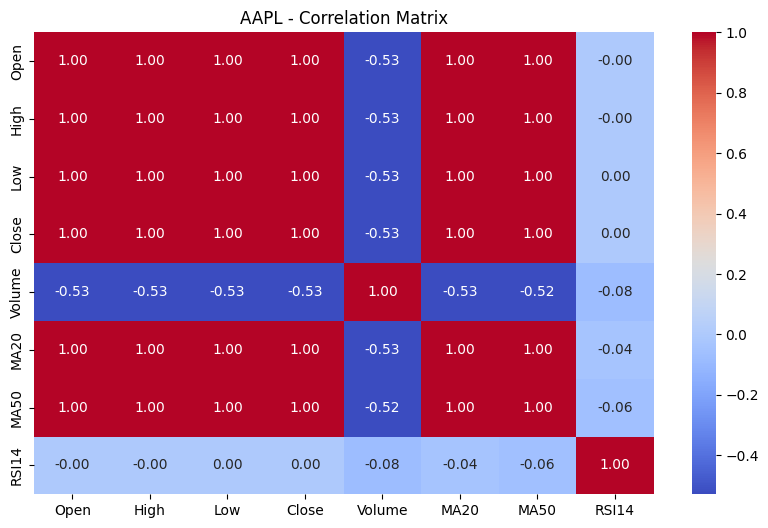


✅ EDA completed. Data now contains technical indicators and is cleaned for model input.


In [11]:
# -----------------------------------------------
# 📊 3. Exploratory Data Analysis (EDA)
# -----------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator
import os

# ✅ Use the actual path where your data was saved earlier
data_dir = "/content/stock-lstm-project/data"  # Correct path
ticker = "AAPL"

# 📂 Load the saved CSV file
csv_path = os.path.join(data_dir, f"{ticker}.csv")

# ✅ Check if file exists before proceeding
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"🛑 File not found: {csv_path}")

# ✅ Load CSV without skipping rows
df = pd.read_csv(csv_path)

# 🔍 Display first few rows
print("📄 First few rows of raw data:")
print(df.head())

# 🧹 Clean column headers
df.columns = df.columns.str.strip()

# ✅ Ensure 'Date' column exists
if 'Date' not in df.columns:
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Date'}, inplace=True)

# 🧪 Convert 'Date' and numeric columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ⛔ Drop rows with missing Date or Close values
df.dropna(subset=['Date', 'Close'], inplace=True)

# ⏰ Set Date as index
df.set_index('Date', inplace=True)

# ✅ Quick preview
print("\n📄 Data preview:")
print(df.head())

# ✅ Summary statistics
print("\n📊 Descriptive statistics:")
print(df.describe())

# ✅ Data types and null checks
print("\n🧪 Data types and null values:")
print(df.info())

# ---------------------------------------------------
# 📉 Line Plot: Closing Price Over Time
# ---------------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close Price', color='dodgerblue')
plt.title(f'{ticker} - Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 🧮 Technical Indicators
# ---------------------------------------------------
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

rsi = RSIIndicator(close=df['Close'], window=14)
df['RSI14'] = rsi.rsi()

# Drop NaNs created by rolling indicators
df.dropna(inplace=True)

# ---------------------------------------------------
# 📈 Plot: Close Price + MA20 + MA50
# ---------------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close', color='gray')
plt.plot(df['MA20'], label='MA20', color='blue')
plt.plot(df['MA50'], label='MA50', color='orange')
plt.title(f'{ticker} - Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 📊 RSI Plot
# ---------------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(df['RSI14'], label='RSI14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{ticker} - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 🧪 Correlation Heatmap
# ---------------------------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA20', 'MA50', 'RSI14']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'{ticker} - Correlation Matrix')
plt.show()

# ✅ Final confirmation
print(f"\n✅ EDA completed. Data now contains technical indicators and is cleaned for model input.")


##🧪 Block 4: Data Preparation - Scale & Sequence
🧪 This block prepares the cleaned and enriched data for LSTM model training by scaling and reshaping it into sequences.

1️⃣ **Feature Selection**:
   - Uses a subset of features: `Close`, `MA20`, `MA50`, and `RSI14`.

2️⃣ **Scaling**:
   - Applies Min-Max Scaling to normalize values between 0 and 1 (LSTM is sensitive to input scale).

3️⃣ **Creating Sequences**:
   - Transforms the scaled data into overlapping sequences (sliding windows) of 60 time steps (n_steps = 60) to capture temporal dependencies.

4️⃣ **Train-Test Split**:
   - Splits the data into training (80%) and testing (20%) sets.

✅ This reshaping process is crucial for feeding the data into the LSTM network, which learns patterns across time steps in a sequential manner.



In [12]:
# -----------------------------------------------
# 🧪 4. Data Preparation - Scale & Sequence
# -----------------------------------------------

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ✅ Step 1: Select Features for the Model
features = ['Close', 'MA20', 'MA50', 'RSI14']

# ✅ Step 2: Initialize MinMaxScaler and Scale Features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[features].values)

# ✅ Step 3: Create Sequences for LSTM Input
def create_sequences(data, n_steps=60):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i, 0])  # Predicting 'Close' price
    return np.array(X), np.array(y)

# Define time step
n_steps = 60

# Generate sequences
X, y = create_sequences(data_scaled, n_steps)

# ✅ Step 4: Train-Test Split (80/20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ✅ Confirm shape of datasets
print(f"\n✅ Data preparation completed.")
print(f"📦 X_train shape: {X_train.shape}")
print(f"📦 y_train shape: {y_train.shape}")
print(f"📦 X_test shape: {X_test.shape}")
print(f"📦 y_test shape: {y_test.shape}")



✅ Data preparation completed.
📦 X_train shape: (2730, 60, 4)
📦 y_train shape: (2730,)
📦 X_test shape: (683, 60, 4)
📦 y_test shape: (683,)


##🏗️ Block 5: Build, Tune & Train the Enhanced LSTM Model
🏗️ This block builds, tunes, and trains an advanced LSTM neural network for stock price prediction using the prepared sequences.

1️⃣ **Model Architecture**:
   - A 3-layer stacked LSTM network with decreasing units (128 → 64 → 32), each followed by Dropout (0.2) to prevent overfitting.
   - A Dense layer with ReLU activation followed by a final output layer predicting the next `Close` price.

2️⃣ **Compilation**:
   - Uses the RMSprop optimizer (good for time-series) with a low learning rate (1e-4).
   - Loss function is Mean Squared Error (MSE).

3️⃣ **Callbacks**:
   - `EarlyStopping` to halt training when validation loss stops improving.
   - `ReduceLROnPlateau` to dynamically lower the learning rate when plateauing.

4️⃣ **Training**:
   - Trains for up to 150 epochs with a small batch size (8) and 10% validation split.

5️⃣ **Model Saving**:
   - Saves the best model weights to `/models/lstm_best_tuned.weights.h5`.

✅ This setup ensures robust training, avoids overfitting, and adapts to data complexity with deep sequential learning.



📋 Enhanced LSTM Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,009 (511.75 KB)

 Trainable params: 131,009 (511.75 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Training enhanced LSTM...
Epoch 1/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 35s 94ms/step - loss: 1.5985e-04 - val_loss: 0.0291 - learning_rate: 1.0000e-04
Epoch 2/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - loss: 0.0067 - val_loss: 0.0356 - learning_rate: 1.0000e-04
Epoch 3/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 0.0040 - val_loss: 0.0256 - learning_rate: 1.0000e-04
Epoch 4/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - loss: 0.0035 - val_loss: 0.0312 - learning_rate: 1.0000e-04
Epoch 5/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - loss: 0.0026 - val_loss: 0.0336 - learning_rate: 1.0000e-04
Epoch 6/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - loss: 0.0021 - val_loss: 0.0190 - learning_rate: 1.0000e-04
Epoch 7/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - loss: 0.0023 - val_loss: 0.0238 - learning_rate: 1.0000e-04
Epoch 8/150
308/308 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - loss: 0.0017 - val_loss: 0.0220 - learning_rate: 1.0000e-04
Epoch 9/150
308/308 ━━━━━━━━━━

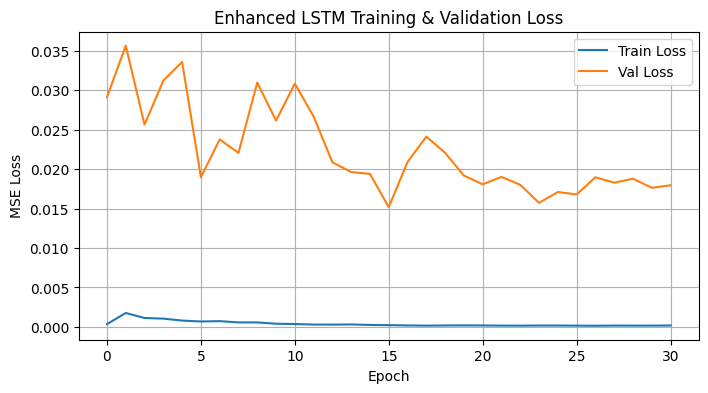

In [20]:
# -----------------------------------------------
# ▶️ 5. Build, Tune & Train the Enhanced LSTM Model
# -----------------------------------------------

from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import matplotlib.pyplot as plt

# 🔍 New hyperparameters
lstm_units_1  = 128       # first LSTM layer units
lstm_units_2  = 64        # second LSTM layer units
lstm_units_3  = 32        # third LSTM layer units
dropout_rate  = 0.2       # reduce dropout for less under-fitting
learning_rate = 1e-4      # lower LR for finer weight updates
batch_size    = 8         # smaller batch size
epochs        = 150       # extended training with callbacks

# ✅ Step 1: Define a deeper, tuned LSTM architecture
model = Sequential([
    Input(shape=(n_steps, len(features))),
    LSTM(lstm_units_1, return_sequences=True),
    Dropout(dropout_rate),

    LSTM(lstm_units_2, return_sequences=True),
    Dropout(dropout_rate),

    LSTM(lstm_units_3),      # final LSTM compressing sequence
    Dropout(dropout_rate),

    Dense(32, activation='relu'),
    Dense(1)
])

# ✅ Step 2: Compile with RMSprop for time-series and tuned LR
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

print("\n📋 Enhanced LSTM Model Summary:")
model.summary()

# ✅ Step 3: Callbacks for convergence and LR scheduling
es = EarlyStopping(
    monitor='val_loss',
    patience=15,             # wait longer for genuine improvement
    restore_best_weights=True
)
rlr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,              # halve LR when plateau
    patience=7,
    min_lr=1e-7
)

# ✅ Step 4: Train with new settings
print("\n🚀 Training enhanced LSTM...")
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    shuffle=False,
    callbacks=[es, rlr]
)

# ✅ Step 5: Save the improved weights
weights_path = os.path.join(models_dir, 'lstm_best_tuned.weights.h5')
model.save_weights(weights_path)
print(f"\n💾 Best tuned weights saved to: {weights_path}")

# -----------------------------------------------
# 📈 6. Plot Training & Validation Loss
# -----------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Enhanced LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


##📈 Block 6: Predict, Evaluate & Report Accuracy
📈 This block evaluates the trained LSTM model on the test set and visualizes how well the predictions align with actual stock prices.

1️⃣ **Prediction**:
   - Uses the trained model to predict on the test data (`X_test`).
   - The predictions are inverse-transformed to original price scale using the same scaler.

2️⃣ **Visualization**:
   - Plots actual vs. predicted closing prices to visually assess model performance.

3️⃣ **Evaluation Metrics**:
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - Mean Absolute Error (MAE)
   - R² Score (coefficient of determination)

4️⃣ **Directional Accuracy**:
   - Calculates how often the model correctly predicts the direction (up/down) of stock movement — a practical success measure in trading.

✅ This block delivers both quantitative metrics and visual diagnostics to understand the effectiveness of your model’s predictions.



🔮 Generating predictions on X_test...
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


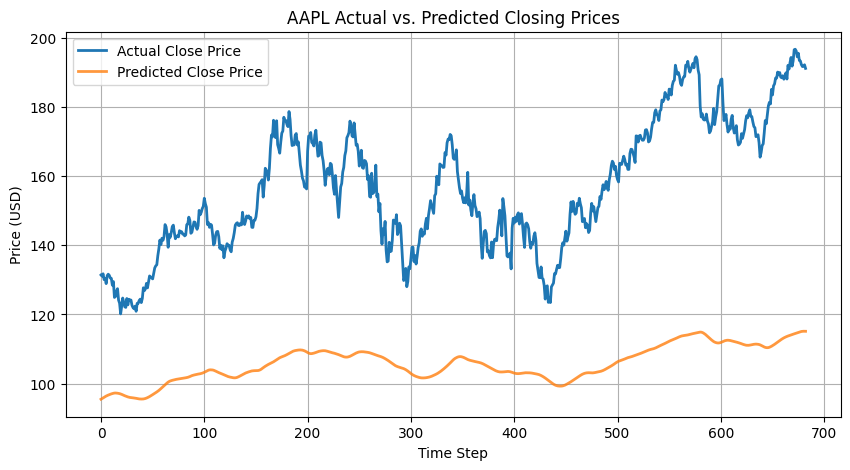


📊 Evaluation Metrics:
• Mean Squared Error (MSE): 2789.1569
• Root Mean Squared Error (RMSE): 52.8125
• Mean Absolute Error (MAE): 50.8147
• R² Score: -6.9223


In [27]:
# -----------------------------------------------
# ▶️ 6. Predict, Evaluate & Report Accuracy
# -----------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Step 1: Generate predictions on the test set
print("\n🔮 Generating predictions on X_test...")
y_pred_scaled = model.predict(X_test)

# ✅ Step 2: Inverse-transform the scaled values back to original price scale
# Create a dummy array of the same shape as features to apply the scaler’s inverse_transform
dummy = np.zeros((len(y_pred_scaled), len(features)))
# Place predictions in the 'Close' position (index 0)
dummy[:, 0] = y_pred_scaled[:, 0]
# Inverse-scale to original units
y_pred = scaler.inverse_transform(dummy)[:, 0]

# Similarly transform the true y values
dummy[:, 0] = y_test
y_true = scaler.inverse_transform(dummy)[:, 0]

# ✅ Step 3: Plot Actual vs. Predicted closing prices
plt.figure(figsize=(10, 5))
plt.plot(y_true, label='Actual Close Price', linewidth=2)
plt.plot(y_pred, label='Predicted Close Price', linewidth=2, alpha=0.8)
plt.title(f'{ticker} Actual vs. Predicted Closing Prices')
plt.xlabel('Time Step')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 4: Compute regression evaluation metrics
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

# ✅ Step 5: Compute directional accuracy
#    Percentage of times the model correctly predicts the direction of price movement
actual_dir = np.sign(np.diff(y_true))
pred_dir   = np.sign(np.diff(y_pred))
directional_accuracy = np.mean(actual_dir == pred_dir)

# ✅ Step 6: Display all metrics
print("\n📊 Evaluation Metrics:")
print(f"• Mean Squared Error (MSE): {mse:.4f}")
print(f"• Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"• Mean Absolute Error (MAE): {mae:.4f}")
print(f"• R² Score: {r2:.4f}")
